In [3]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
# from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


In [4]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
# (X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
X_train.dtype

dtype('uint8')

# Method 1: 類別無大小關係 -> 最終輸出為各label的機率分配
## loss='categorical_crossentropy' (輸出one-hot-encoding )

In [7]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
# model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=256, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 可加可不加!
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [8]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
# 將 output 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [13]:
y_TrainOneHot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
# 將 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], -1).astype('float32')  
X_test_2D = X_test.reshape(X_test.shape[0], -1).astype('float32')  

X_Train_norm = X_train_2D / 255
X_Test_norm = X_test_2D / 255
X_Train_norm.shape

(60000, 784)

In [16]:
60000 * (1 - 0.2) == 800 * 60

True

In [17]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

Epoch 1/10
60/60 - 1s - loss: 1.0394 - accuracy: 0.7280 - val_loss: 0.3427 - val_accuracy: 0.9014
Epoch 2/10
60/60 - 0s - loss: 0.3561 - accuracy: 0.8963 - val_loss: 0.2418 - val_accuracy: 0.9306
Epoch 3/10
60/60 - 0s - loss: 0.2648 - accuracy: 0.9237 - val_loss: 0.1949 - val_accuracy: 0.9453
Epoch 4/10
60/60 - 0s - loss: 0.2123 - accuracy: 0.9395 - val_loss: 0.1639 - val_accuracy: 0.9517
Epoch 5/10
60/60 - 0s - loss: 0.1780 - accuracy: 0.9488 - val_loss: 0.1462 - val_accuracy: 0.9581
Epoch 6/10
60/60 - 0s - loss: 0.1517 - accuracy: 0.9564 - val_loss: 0.1299 - val_accuracy: 0.9627
Epoch 7/10
60/60 - 0s - loss: 0.1302 - accuracy: 0.9619 - val_loss: 0.1170 - val_accuracy: 0.9657
Epoch 8/10
60/60 - 0s - loss: 0.1143 - accuracy: 0.9666 - val_loss: 0.1126 - val_accuracy: 0.9659
Epoch 9/10
60/60 - 0s - loss: 0.0999 - accuracy: 0.9710 - val_loss: 0.1044 - val_accuracy: 0.9688
Epoch 10/10
60/60 - 0s - loss: 0.0886 - accuracy: 0.9737 - val_loss: 0.1001 - val_accuracy: 0.9694


In [18]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

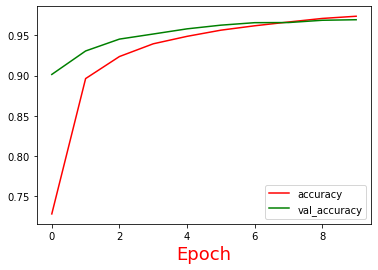

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(train_history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

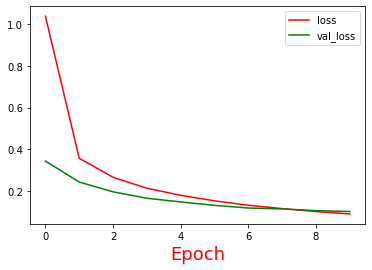

In [21]:
plt.plot(train_history.history['loss'], 'r', label = 'loss')
plt.plot(train_history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (800, 256)                200960    
_________________________________________________________________
dense_1 (Dense)              (800, 64)                 16448     
_________________________________________________________________
dropout (Dropout)            (800, 64)                 0         
_________________________________________________________________
dense_2 (Dense)              (800, 10)                 650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_Test_norm, y_TestOneHot)  
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 0s 899us/step - loss: 0.0928 - accuracy: 0.9717

	[Info] Accuracy of testing data = 97.2%


In [24]:
# 預測(prediction)
X = X_Test_norm
predictions = model.predict_classes(X)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [24]:
# 機率分配
predictions_proba = model.predict_proba(X)
print(predictions_proba[:20])
print('-' * 30)
print(np.sum(predictions_proba[:20], axis=1))
print('-' * 30)
print(np.argmax(predictions_proba[:20], axis = -1))
print('-' * 30)
print(np.argmax(predictions_proba[:20], axis = 1))

[[6.53272400e-06 5.77906007e-07 9.23094572e-04 1.09076151e-03
  4.37889582e-08 7.32762601e-07 4.31650771e-10 9.97957230e-01
  2.52991822e-06 1.85029858e-05]
 [7.73944464e-07 7.24607031e-04 9.98955488e-01 3.14069650e-04
  3.24694230e-11 1.11011286e-06 1.32044491e-07 4.10221105e-07
  3.55863381e-06 8.09196177e-09]
 [6.56759876e-05 9.94288802e-01 5.23758761e-04 4.43701225e-04
  1.04115740e-03 2.18920177e-04 5.26212505e-04 2.26137135e-03
  5.47360745e-04 8.29777418e-05]
 [9.99666214e-01 3.17357546e-07 1.61720964e-04 1.53366420e-06
  1.11042226e-07 3.33234893e-05 3.63752624e-05 8.69849537e-05
  5.44359182e-07 1.27853436e-05]
 [2.53320536e-06 1.06532627e-06 1.15360081e-06 1.03441539e-06
  9.96616662e-01 2.38874745e-05 1.00446567e-04 4.72852953e-05
  4.65811136e-05 3.15940473e-03]
 [7.67951042e-06 9.96893883e-01 2.89049112e-05 6.29134811e-05
  2.05027987e-04 4.29283818e-06 8.51777713e-06 2.72581098e-03
  3.57168392e-05 2.71944409e-05]
 [6.23987617e-08 1.11778309e-06 1.38578514e-07 1.27595445e

(28, 28)


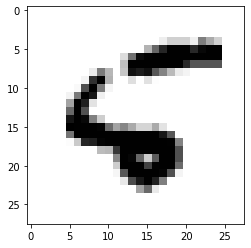

In [25]:
# 顯示錯誤的資料圖像
X2 = X_test[8,:,:]
print(X2.shape)
# plt.imshow(X2.reshape(28,28), cmap = plt.get_cmap('gray'))
# plt.imshow(X2)
plt.imshow(X2, cmap = plt.get_cmap('binary'))
plt.show()

In [26]:
prob = model.predict(X)
print(prob)

[[3.63742356e-06 9.71811096e-06 1.17345888e-04 ... 9.98579860e-01
  2.36516121e-06 7.56401641e-05]
 [1.27019703e-07 2.31291633e-03 9.97173309e-01 ... 6.26195117e-07
  7.05244565e-06 1.62512490e-10]
 [4.17412730e-06 9.96063411e-01 4.54343855e-04 ... 2.05834117e-03
  4.46208374e-04 1.66049176e-05]
 ...
 [1.07372511e-09 5.60066375e-08 4.08599599e-09 ... 1.81939686e-06
  1.09391003e-05 7.26900398e-05]
 [1.10334554e-07 3.73806088e-08 1.67657804e-10 ... 6.63017552e-09
  4.00351826e-04 1.04119316e-07]
 [1.29569344e-06 5.30844524e-09 6.80445567e-07 ... 5.83206053e-11
  4.50417303e-08 1.70884945e-10]]


In [27]:
prob[8]

array([6.9353358e-05, 3.3644024e-05, 5.8977323e-04, 1.6230073e-05,
       6.2020118e-03, 4.7862998e-01, 5.1386708e-01, 6.6011091e-07,
       5.7404273e-04, 1.7194521e-05], dtype=float32)

In [28]:
np.argmax(prob[8])

6

In [29]:
prob[0]

array([3.63742356e-06, 9.71811096e-06, 1.17345888e-04, 1.20707520e-03,
       4.24022545e-07, 3.86604324e-06, 1.03666906e-07, 9.98579860e-01,
       2.36516121e-06, 7.56401641e-05], dtype=float32)

In [30]:
np.argmax(prob[0])

7

In [31]:
model.save('20200830.h5')

# # Method 2: 類別有大小關係 -> 最終輸出為1個數值
## loss='sparse_categorical_crossentropy' (輸出1個數值)

In [37]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
# model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=256, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 可加可不加!
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [38]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_Train_norm, y=y_train, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

Epoch 1/10
60/60 - 0s - loss: 1.0277 - accuracy: 0.7215 - val_loss: 0.3478 - val_accuracy: 0.8997
Epoch 2/10
60/60 - 0s - loss: 0.3513 - accuracy: 0.8973 - val_loss: 0.2444 - val_accuracy: 0.9312
Epoch 3/10
60/60 - 0s - loss: 0.2657 - accuracy: 0.9245 - val_loss: 0.1943 - val_accuracy: 0.9448
Epoch 4/10
60/60 - 0s - loss: 0.2096 - accuracy: 0.9400 - val_loss: 0.1653 - val_accuracy: 0.9526
Epoch 5/10
60/60 - 0s - loss: 0.1781 - accuracy: 0.9479 - val_loss: 0.1422 - val_accuracy: 0.9588
Epoch 6/10
60/60 - 0s - loss: 0.1514 - accuracy: 0.9564 - val_loss: 0.1316 - val_accuracy: 0.9616
Epoch 7/10
60/60 - 0s - loss: 0.1302 - accuracy: 0.9620 - val_loss: 0.1209 - val_accuracy: 0.9633
Epoch 8/10
60/60 - 0s - loss: 0.1171 - accuracy: 0.9665 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 9/10
60/60 - 0s - loss: 0.1024 - accuracy: 0.9704 - val_loss: 0.1061 - val_accuracy: 0.9681
Epoch 10/10
60/60 - 0s - loss: 0.0911 - accuracy: 0.9740 - val_loss: 0.1004 - val_accuracy: 0.9703


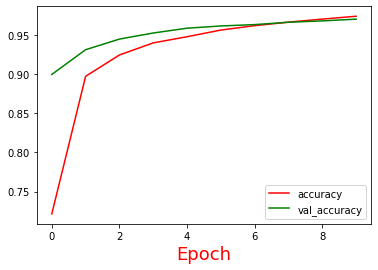

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(train_history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

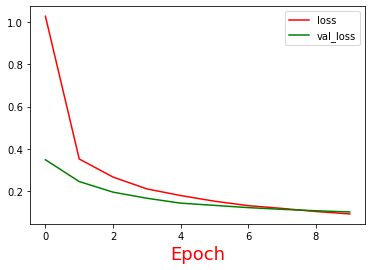

In [41]:
plt.plot(train_history.history['loss'], 'r', label = 'loss')
plt.plot(train_history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (800, 256)                200960    
_________________________________________________________________
dense_4 (Dense)              (800, 64)                 16448     
_________________________________________________________________
dropout_1 (Dropout)          (800, 64)                 0         
_________________________________________________________________
dense_5 (Dense)              (800, 10)                 650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_Test_norm, y_test)  
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 0s 762us/step - loss: 0.0953 - accuracy: 0.9717

	[Info] Accuracy of testing data = 97.2%
